In [4]:
import os
import pandas as pd
os.listdir('Data')
df = pd.read_csv("Data/Njeri_full_year.csv")
df.head()

,Unnamed: 0,Receipt No.,Completion Time,Details,Transaction\rStatus,Paid In,Withdrawn,Balance,Unnamed: 0.1,Transaction,All Details,variables,Party,totals,clean_time,Names,Month
0,0,NH10MSK4X8,2019-08-01 15:48:53,Pay Bill Charge,Completed,NaN,-34.00,"24,339.11",NaN,NaN,Pay Bill Charge nan,charge,NaN,NaN,2019-08-01 15:48:53,NaN,August:2019
1,1,NH10MSK4X8,2019-08-01 15:48:53,Pay Bill to 544700 - UNAITAS SACCO Limited Acc...,Completed,NaN,"-1,000.00","24,373.11",NaN,NaN,Pay Bill to 544700 - UNAITAS SACCO Limited Acc...,Payment,544700 - unaitas sacco limited acc.\r100967233...,NaN,2019-08-01 15:48:53,unaitas sacco,August:2019
2,2,NH17MSGLHX,2019-08-01 15:45:24,Customer Transfer of Funds Charge,Completed,NaN,-15.00,"25,373.11",NaN,NaN,Customer Transfer of Funds Charge nan,charge,NaN,NaN,2019-08-01 15:45:24,NaN,August:2019
3,3,NH17MSGLHX,2019-08-01 15:45:24,Customer Transfer to 254729675519 - DAMARIS\rO...,Completed,NaN,"-1,000.00","25,388.11",NaN,NaN,Customer Transfer to 254729675519 - DAMARIS\rO...,Transfer,254729675519 - damaris\rodeny nan,NaN,2019-08-01 15:45:24,damaris odeny,August:2019
4,4,NH16MQ7TAC,2019-08-01 14:24:25,Airtime Purchase,Completed,NaN,-100.00,"26,388.11",NaN,NaN,Airtime Purchase nan,airtime,NaN,NaN,2019-08-01 14:24:25,NaN,August:2019


# Data Cleaning
## preliminary

In [13]:

print("##"*40)
# data shape
print(df.shape)
# get column types -  info
print("##"*40)

print(df.info())
# do a data summary
print("##"*40)
df.describe()

################################################################################
(2597, 17)
################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2597 non-null   int64  
 1   Receipt No.         2597 non-null   object 
 2   Completion Time     2597 non-null   object 
 3   Details             2493 non-null   object 
Status  2187 non-null   object 
 5   Paid In             769 non-null    object 
 6   Withdrawn           1828 non-null   object 
 7   Balance             2597 non-null   object 
 8   Unnamed: 0.1        105 non-null    object 
 9   Transaction         410 non-null    object 
 10  All Details         2597 non-null   object 
 11  variables           2597 non-null   object 
 12  Party               1152 non-null   object 
 1

,Unnamed: 0,totals
count,2597.000000,769.000000
mean,25.682711,3147.227841
std,15.813904,6303.304187
min,0.000000,7.890000
25%,12.000000,500.000000
50%,25.000000,1000.000000
75%,39.000000,3000.000000
max,59.000000,60000.000000


In [5]:
# Detecting missing values
# detecting outliers
# detecting duplicates
# many others

In [7]:
#Detecting missing values
df.isnull().sum()

Unnamed: 0                0
Receipt No.               0
Completion Time           0
Details                 104
Transaction\rStatus     410
Paid In                1828
Withdrawn               769
Balance                   0
Unnamed: 0.1           2492
Transaction            2187
All Details               0
variables                 0
Party                  1445
totals                 1828
clean_time                0
Names                  1447
Month                     0
dtype: int64

In [18]:
# select columns youll need (filtering the data)
useful = ["Completion Time","Paid In","Withdrawn","variables"]
dt = df[useful]
dt.head()

,Completion Time,Paid In,Withdrawn,variables
0,2019-08-01 15:48:53,NaN,-34.00,charge
1,2019-08-01 15:48:53,NaN,"-1,000.00",Payment
2,2019-08-01 15:45:24,NaN,-15.00,charge
3,2019-08-01 15:45:24,NaN,"-1,000.00",Transfer
4,2019-08-01 14:24:25,NaN,-100.00,airtime


In [20]:
# ensure the date column is a date
dt["Completion Time"] = pd.DatetimeIndex(dt["Completion Time"])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Completion Time  2597 non-null   datetime64[ns]
 1   Paid In          769 non-null    object        
 2   Withdrawn        1828 non-null   object        
 3   variables        2597 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 81.3+ KB


<ipython-input-20-a3e2f73e7c0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Completion Time"] = pd.DatetimeIndex(dt["Completion Time"])


In [38]:
dt["Paid In"] = [float(str(i).replace(",","")) for i in dt["Paid In"]]
dt["Withdrawn"] = [float(str(i).replace(",","")) * -1 for i in dt["Withdrawn"]]

<ipython-input-38-e99c882bd28b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Paid In"] = [float(str(i).replace(",","")) for i in dt["Paid In"]]
<ipython-input-38-e99c882bd28b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Withdrawn"] = [float(str(i).replace(",","")) * -1 for i in dt["Withdrawn"]]


In [39]:
dt["variables"].value_counts()

unsure      633
charge      495
Received    434
Transfer    368
airtime     301
Payment     295
withdraw     55
internet     16
Name: variables, dtype: int64

In [40]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Completion Time  2597 non-null   datetime64[ns]
 1   Paid In          2597 non-null   float64       
 2   Withdrawn        2597 non-null   float64       
 3   variables        2597 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 81.3+ KB


In [41]:
# deal with the nulls
dt.isnull().sum()
# three methods for dealing with nulls
# dt.dropna()  - drops the entire data: any row with a null
# df.fillna() -  impute the data ( replace nulls with something  - replacing with mean,median  - include 0 or -1)
dt["Paid In"] = dt["Paid In"].fillna(0)
dt["Withdrawn"] = dt["Withdrawn"].fillna(0)
dt.isnull().sum()

<ipython-input-41-ee37308fd9bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Paid In"] = dt["Paid In"].fillna(0)
<ipython-input-41-ee37308fd9bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Withdrawn"] = dt["Withdrawn"].fillna(0)


Completion Time    0
Paid In            0
Withdrawn          0
variables          0
dtype: int64

<AxesSubplot:>

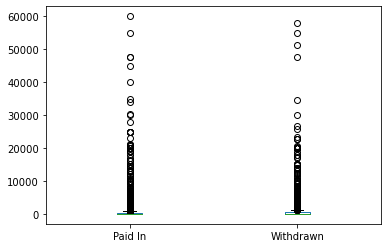

In [42]:
# detect outliers
dt.plot(kind = "box")

In [44]:
# remove negatives
dt["Withdrawn"] = dt["Withdrawn"] *-1
dt.head()

<ipython-input-44-3d9ecb189536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Withdrawn"] = dt["Withdrawn"] *-1


,Completion Time,Paid In,Withdrawn,variables
0,2019-08-01 15:48:53,0.0,34.0,charge
1,2019-08-01 15:48:53,0.0,1000.0,Payment
2,2019-08-01 15:45:24,0.0,15.0,charge
3,2019-08-01 15:45:24,0.0,1000.0,Transfer
4,2019-08-01 14:24:25,0.0,100.0,airtime


In [45]:
# assignment
# subset the data and use different columns
# do the preliminaries
#detect outliers
# detect NAs and deal with then (remove and impute them and compare)
# atleas 2 column transformation
# make 2 graphs

In [ ]:
# read on Machine learning
- supervised machine learning
 - atleast one linear model
 -  support vector machine
 - Gradient boosting (tree based models)
 - percepron learning and multi layerd perceptron ( Deep lear)
- unsupervised machine learning ( 2 examples)